# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
df_office_supplies = df_dsa[df_dsa["Categoria"] == "Office Supplies"]
maior = df_office_supplies.groupby('Cidade')['Valor_Venda'].sum().idxmax()
print(maior)

New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

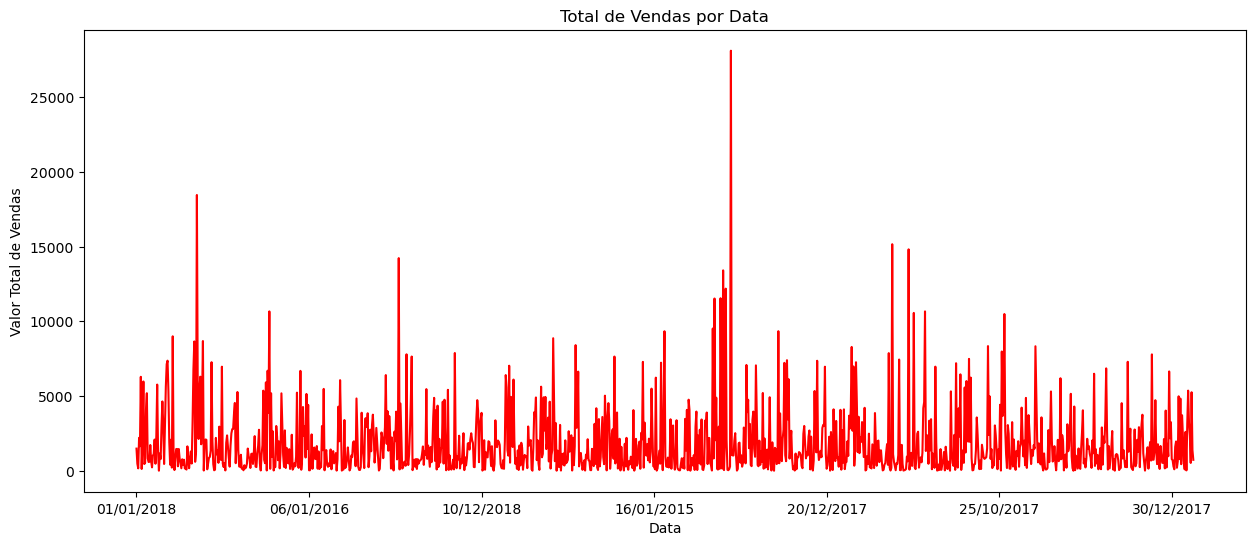

In [13]:
total_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

plt.figure(figsize = (15, 6))
total_data.plot(x = 'Data_pedido', y = 'Valor_Vendas', color = 'red')

plt.title('Total de Vendas por Data')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas')


plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

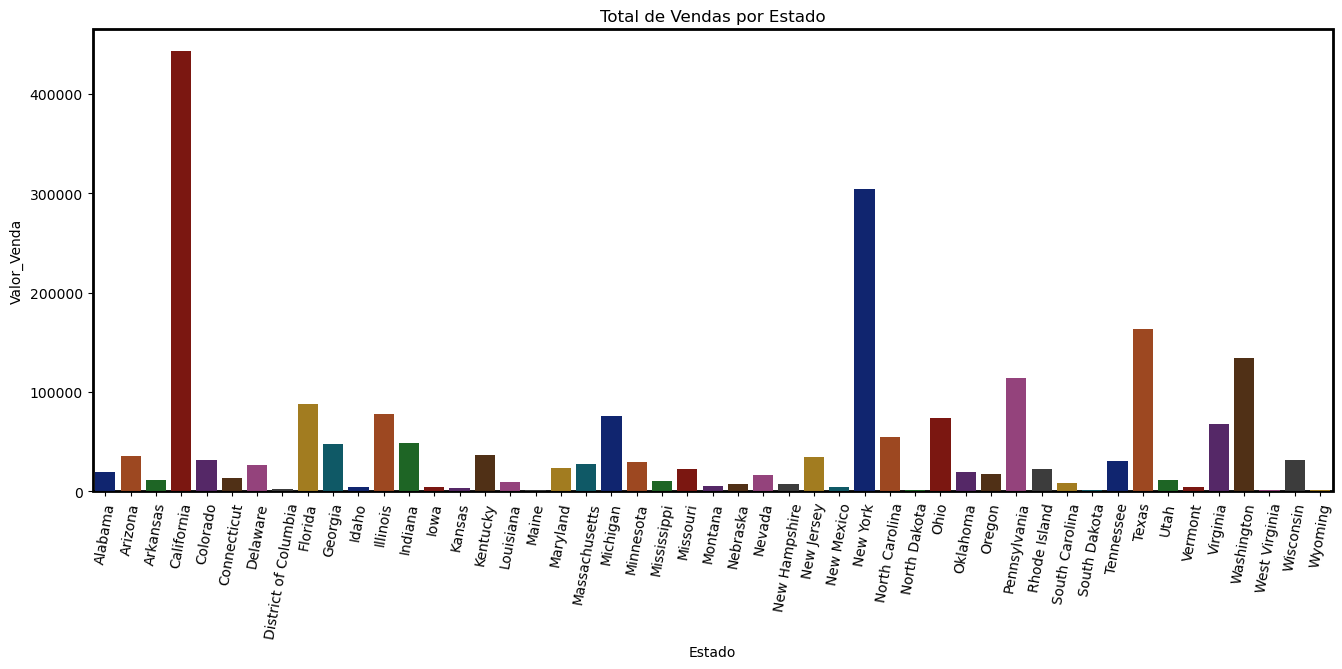

In [14]:
df_total_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

plt.figure(figsize = (16,6))

sns.barplot(
    data=df_total_estado,
    x="Estado", y="Valor_Venda", 
    palette="dark"
).set(title = "Total de Vendas por Estado")

plt.xticks(rotation=80)

plt.gca().patch.set_linewidth(2)  # Define a largura da borda
plt.gca().patch.set_edgecolor("black")

plt.show()




## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

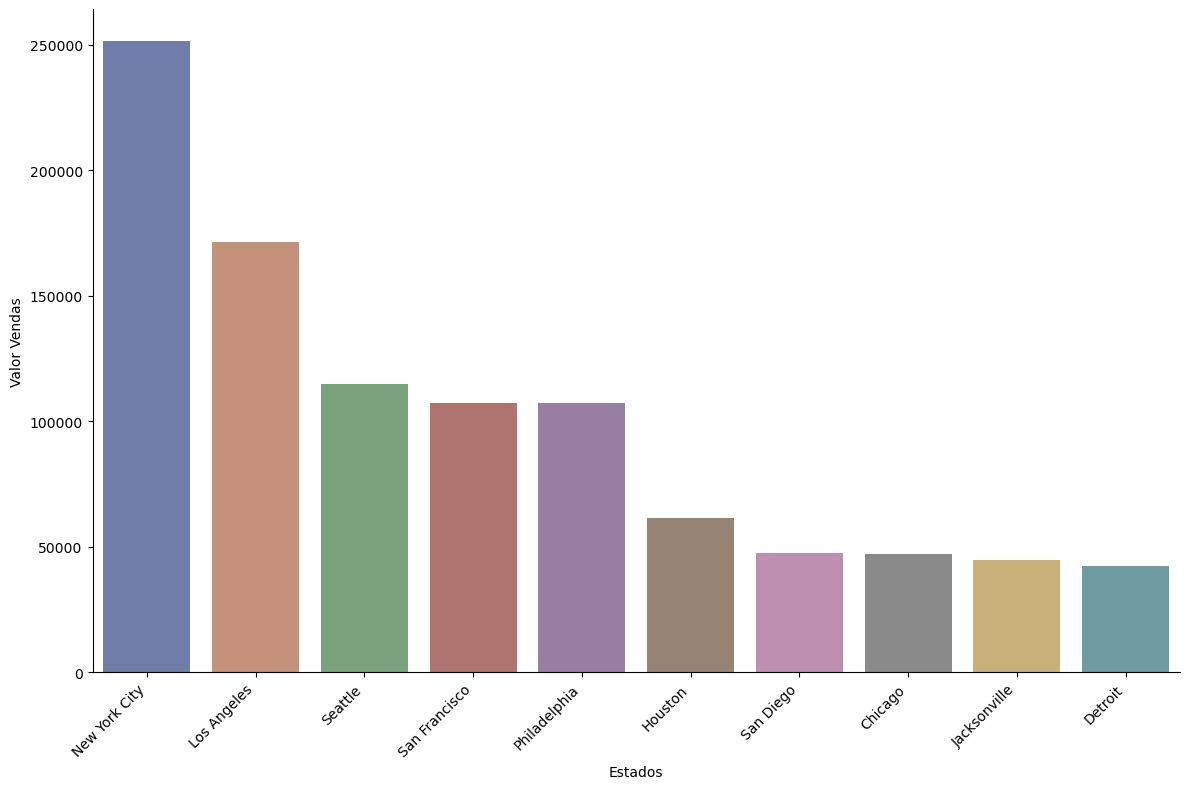

In [15]:
df_total_cidades = df_dsa.groupby('Cidade')['Valor_Venda'].sum().nlargest(10).reset_index()

ax = sns.catplot(
    data=df_total_cidades, kind="bar",
    x="Cidade", y="Valor_Venda", 
    errorbar="sd", palette="dark", alpha=.6, height=8,
    aspect=1.5
)


ax.set_axis_labels("Estados", "Valor Vendas")
ax.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

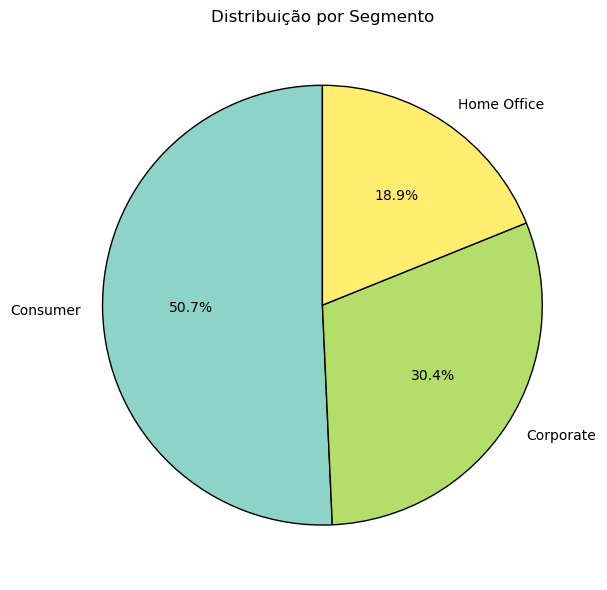

In [16]:
df_total_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()


x = df_total_segmento['Valor_Venda']
colors = plt.get_cmap('Set3')(np.linspace(0, 1, len(x)))
fig, ax = plt.subplots(figsize = (14,6))


ax.pie(x,labels = df_total_segmento['Segmento'],autopct='%1.1f%%', colors=colors,
       wedgeprops={"linewidth": 1, "edgecolor": "black"}, startangle=90)

plt.title('Distribuição por Segmento')
plt.tight_layout()

plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

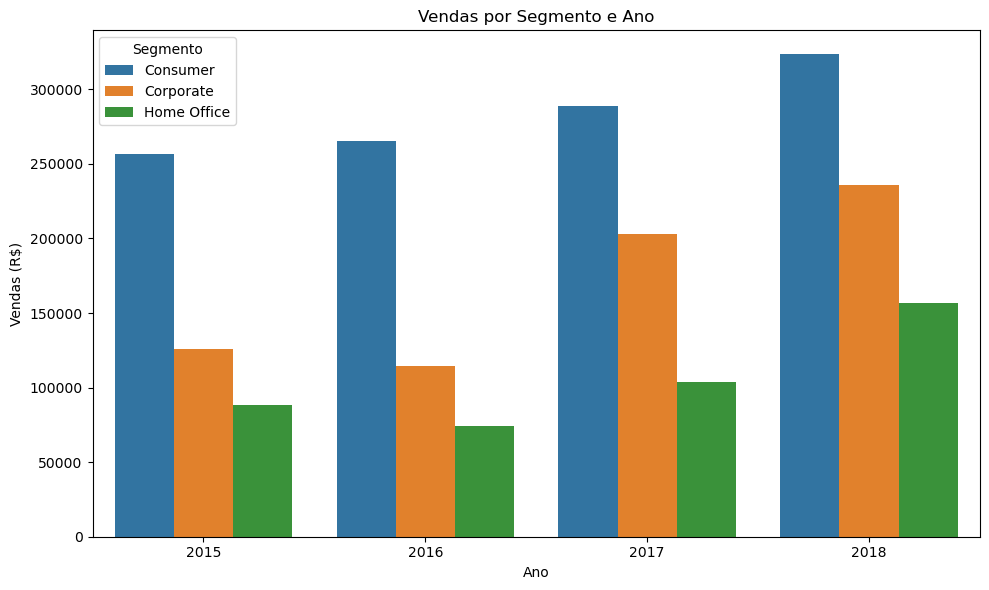

In [17]:
df_dsa["Ano"] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y').dt.year
df_dsa["Ano"].astype(str)
df_total_ano = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(10, 6))
    
sns.barplot(data=df_total_ano, x='Ano', y='Valor_Venda', hue='Segmento')

plt.title('Vendas por Segmento e Ano')
plt.xlabel('Ano')
plt.ylabel('Vendas (R$)')

plt.tight_layout()
plt.show()


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [18]:

df_dsa["Desconto"] = df_dsa["Valor_Venda"].map(lambda x: 0.15 if x >= 1000 else 0.10)
count = df_dsa["Desconto"].value_counts()
print(count)

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [19]:

df_15_desconto = df_dsa[df_dsa["Desconto"] == 0.15].copy()
df_15_desconto["Valor_Venda_Desconto"] = df_15_desconto["Valor_Venda"] - (df_15_desconto["Valor_Venda"] * df_15_desconto["Desconto"])

media_antes = df_15_desconto["Valor_Venda"].mean()
media_depois = df_15_desconto["Valor_Venda_Desconto"].mean()

print(f"""
    Média de Valor de Venda antes do desconto: {round(media_antes, 2)}
    Média de Valor de Venda depois do desconto: {round(media_depois, 2)}
""")



    Média de Valor de Venda antes do desconto: 2116.81
    Média de Valor de Venda depois do desconto: 1799.29



## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

<Figure size 1200x600 with 0 Axes>

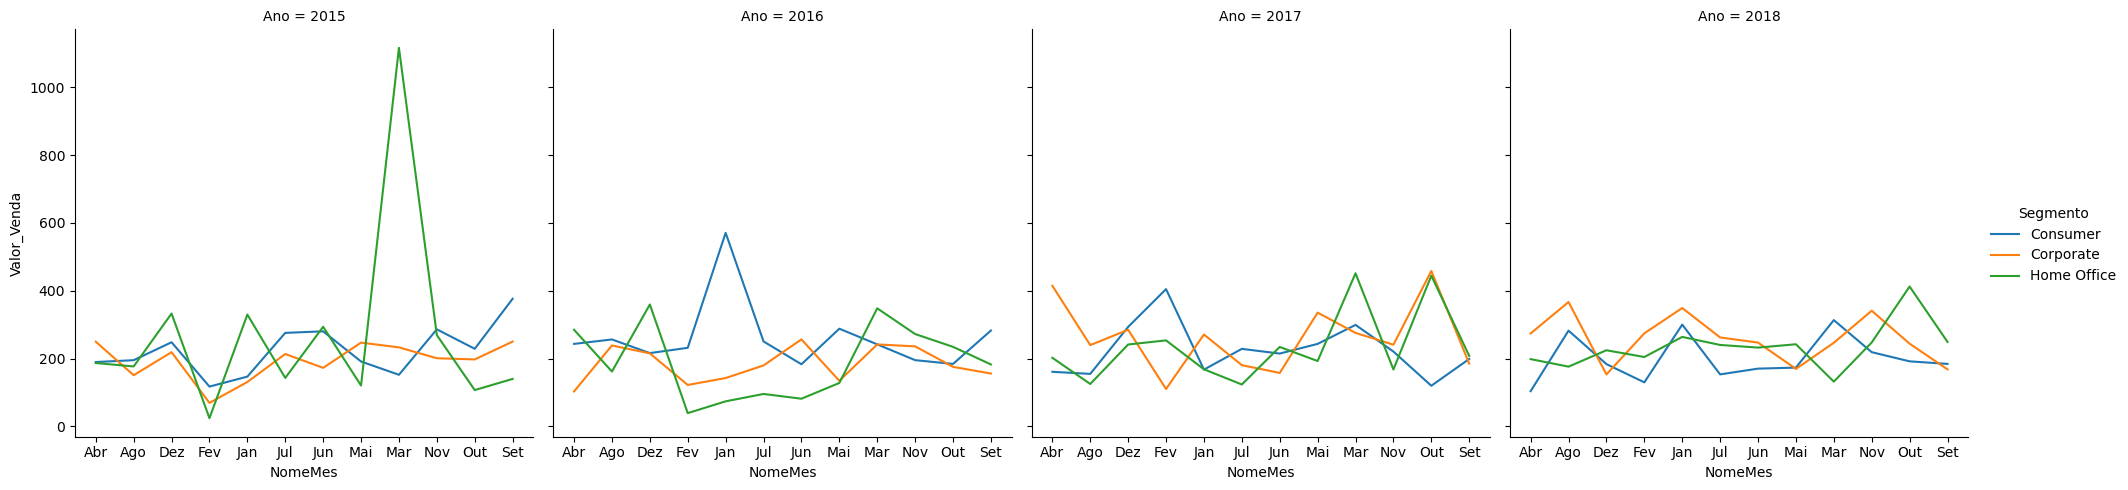

In [20]:
meses_dict = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago', 
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

df_dsa["Mes"] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y').dt.month
df_dsa["NomeMes"] = df_dsa["Mes"].map(meses_dict)

df_media = df_dsa.groupby(['Segmento', 'Ano', "NomeMes"])['Valor_Venda'].mean().reset_index()

plt.figure(figsize = (12,6))

sns.relplot(kind = "line",
            data = df_media,
            y = "Valor_Venda",
            x = "NomeMes",
            hue = "Segmento",
            col = "Ano",
            col_wrap = 4)

plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

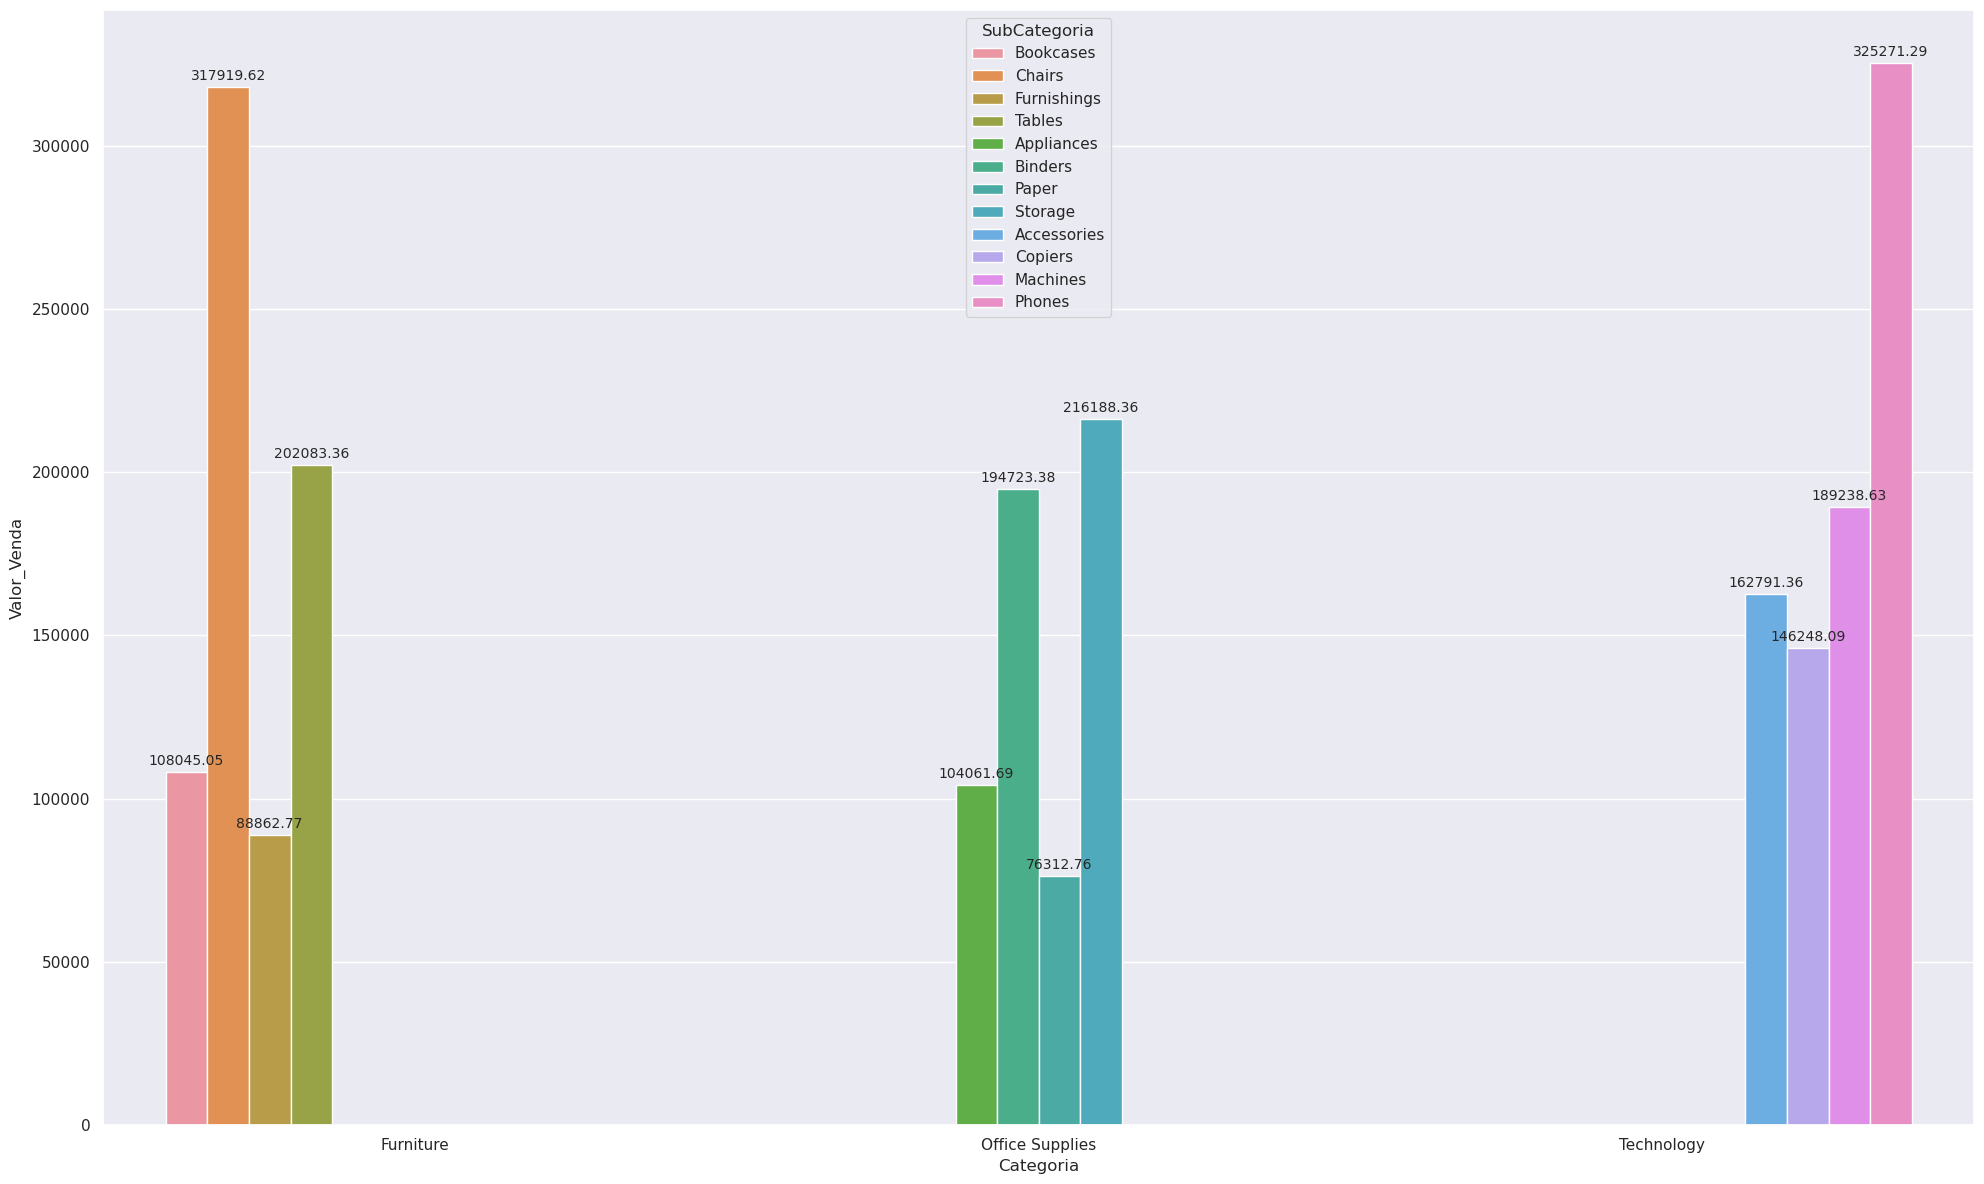

In [21]:
df_total_categorias = df_dsa.groupby('SubCategoria')['Valor_Venda'].sum().nlargest(12).reset_index()
df_total_categorias = df_dsa[df_dsa['SubCategoria'].isin(df_total_categorias['SubCategoria'])]
df_total_categorias = df_total_categorias.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()
df_total_categorias.head()
plt.figure(figsize = (20,12))

sns.set(palette = "dark")
ax = sns.barplot(
            data = df_total_categorias,
            y = "Valor_Venda",
            x = "Categoria",
            hue = "SubCategoria")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=10, padding=3)

plt.tight_layout()
plt.show()
